[0, 8.765, 17.455, 25.74, 33.56, 41.31, 48.82, 56.175, 63.195, 70.47, 77.405, 83.97, 90.68, 97.32, 103.845, 110.305, 116.46, 122.81, 129.045, 135.18, 141.1, 147.265, 153.325, 159.055, 164.555, 170.155, 176.16, 181.535, 186.815, 192.315, 197.575, 203.1, 208.385, 213.73, 218.97, 224.185, 229.375, 234.745, 240.12, 245.055, 250.075, 254.975, 260.075, 265.19, 270.075, 274.96, 280.06, 285.0, 289.82, 294.355, 298.995, 303.68, 308.465, 312.93, 317.68, 322.375, 327.07, 331.375, 336.03, 340.63, 345.045, 349.685, 354.17, 358.465, 362.905, 367.33, 371.92, 376.125, 380.4, 384.815, 389.145, 393.51, 397.64, 401.93, 406.22, 410.4, 414.465, 418.43, 422.55, 426.36, 430.375, 434.375, 438.91, 442.82, 446.885, 450.79, 454.77, 458.615, 462.45, 466.465, 470.185, 474.12, 478.08, 481.94, 485.79, 489.65, 493.56, 497.295, 501.24, 504.995, 508.65, 512.085, 516.075, 520.06, 523.8, 527.76, 531.54, 535.35, 538.96, 542.7, 546.355, 550.075, 553.445, 557.085, 560.63, 564.1, 567.72, 571.35, 574.795, 578.155, 581.81, 585

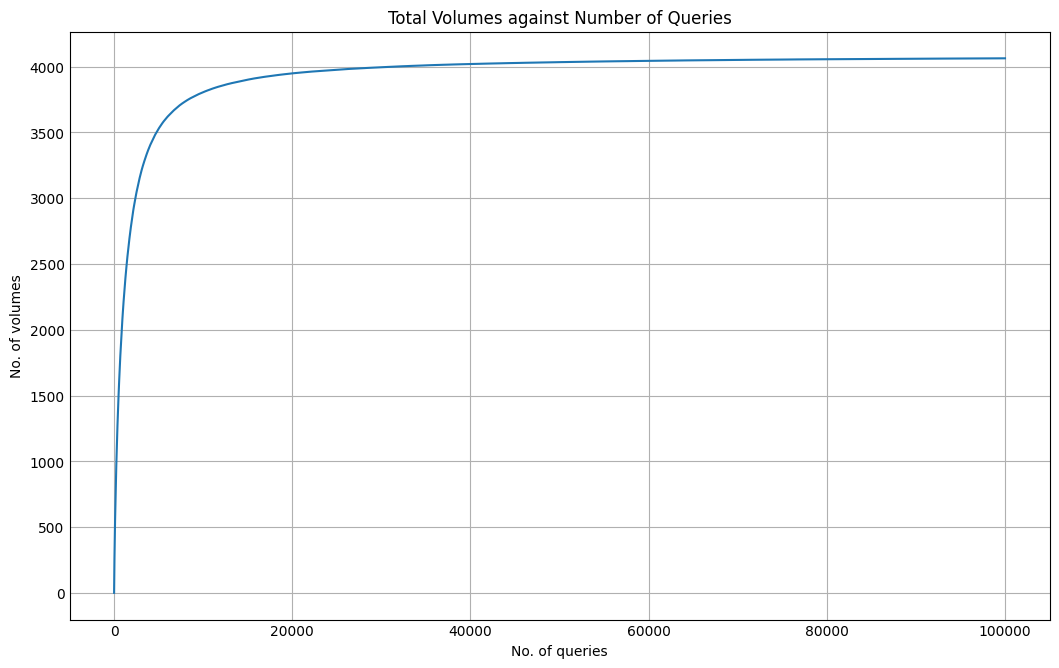

In [1]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)

max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 100000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = set()
        vol_sum = 0
        query_tracker = set()
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.add(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.add(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()